# Exploratory Data Analysis

---
### Essential Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# import the dataset
movies = pd.read_csv('data/cleaned_data.csv')

# describe our data
movies.info()
display(movies.describe())
movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4478 non-null   int64  
 1   genres                4478 non-null   object 
 2   popularity            4478 non-null   float64
 3   production_companies  4478 non-null   object 
 4   revenue               4478 non-null   float64
 5   runtime               4478 non-null   float64
 6   title                 4478 non-null   object 
 7   vote_average          4478 non-null   float64
 8   vote_count            4478 non-null   float64
 9   release_year          4478 non-null   int64  
 10  release_month         4478 non-null   int64  
 11  adj_revenue           4478 non-null   int64  
 12  adj_budget            4478 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 454.9+ KB


,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,adj_revenue,adj_budget
count,4.478000e+03,4478.000000,4.478000e+03,4478.000000,4478.000000,4478.000000,4478.000000,4478.000000,4.478000e+03,4.478000e+03
mean,4.060529e+07,26.228416,1.196056e+08,110.036177,6.423024,2097.398392,2005.930326,6.762394,1.566573e+08,5.419486e+07
std,4.707478e+07,157.743552,1.998341e+08,20.848026,0.852666,3148.538133,7.897182,3.514137,2.495380e+08,6.113924e+07
min,1.000000e+00,0.019984,1.000000e+00,3.000000,1.000000,1.000000,1990.000000,1.000000,1.000000e+00,1.000000e+00
25%,1.100000e+07,10.302500,1.562921e+07,96.000000,5.900000,251.000000,2000.000000,4.000000,2.285673e+07,1.469250e+07
50%,2.500000e+07,14.177500,4.989576e+07,106.000000,6.400000,906.000000,2006.000000,7.000000,6.708825e+07,3.496000e+07
75%,5.100000e+07,23.319500,1.340269e+08,121.000000,7.000000,2520.750000,2012.000000,10.000000,1.815728e+08,7.450000e+07
max,9.653130e+08,9975.169000,2.797801e+09,338.000000,10.000000,28790.000000,2021.000000,12.000000,3.653065e+09,1.650685e+09


,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,release_year,release_month,adj_revenue,adj_budget
0,1350000,"['Comedy', 'Crime']",8.871,"['Summit Entertainment', 'The Steve Tisch Comp...",28356188.0,105.0,"Lock, Stock and Two Smoking Barrels",8.2,4722.0,1998,5,46787710,2227500
1,16000000,"['Crime', 'Drama', 'Action']",34.591,"['Gaumont', 'Les Films du Dauphin']",45284974.0,111.0,L??on: The Professional,8.3,10702.0,1994,9,81965802,28960000
2,1530000,"['Action', 'Drama', 'Thriller']",10.156,"['X Filme Creative Pool', 'WDR']",7267585.0,81.0,Run Lola Run,7.3,1485.0,1998,3,11991515,2524500
3,10000000,"['Crime', 'Comedy']",17.128,"['Screen Gems', 'SKA Films', 'Columbia Pictures']",83557872.0,104.0,Snatch,7.8,6519.0,2000,1,130350280,15600000
4,14000000,"['Romance', 'Comedy']",51.140,"['Touchstone Pictures', 'Silver Screen Partner...",463000000.0,119.0,Pretty Woman,7.4,5615.0,1990,3,949149999,28699999


---
### Categorical Data
---
### 1. Genres
---
- strip(): return a copy of the string in which all chars have been stripped from the beginning and the end of the string (default whitespace characters)
- replace(): return a copy of the string in which the occurrences of old have been replaced with new, optionally restricting the number of replacements to max --> **syntax: str.replace(old, new[, max])**
- Series

In [3]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
print(movies['genres'])

0                        Comedy,Crime
1                  Crime,Drama,Action
2               Action,Drama,Thriller
3                        Crime,Comedy
4                      Romance,Comedy
                    ...              
4473                            Drama
4474             Romance,Comedy,Drama
4475          Thriller,ScienceFiction
4476              Drama,Action,Comedy
4477    Crime,Horror,Mystery,Thriller
Name: genres, Length: 4478, dtype: object


In [4]:
movies['genres'] = movies['genres'].str.split(',')
print(movies['genres'])

0                          [Comedy, Crime]
1                   [Crime, Drama, Action]
2                [Action, Drama, Thriller]
3                          [Crime, Comedy]
4                        [Romance, Comedy]
                       ...                
4473                               [Drama]
4474              [Romance, Comedy, Drama]
4475            [Thriller, ScienceFiction]
4476               [Drama, Action, Comedy]
4477    [Crime, Horror, Mystery, Thriller]
Name: genres, Length: 4478, dtype: object


Number of Genres:  21
Drama             2029
Comedy            1680
Action            1276
Thriller          1248
Adventure          869
Romance            796
Crime              725
Family             563
ScienceFiction     547
Fantasy            515
Horror             481
Mystery            377
Animation          297
History            215
War                139
Music              126
Documentary         51
Western             50
                     6
Foreign              4
TVMovie              3
dtype: int64


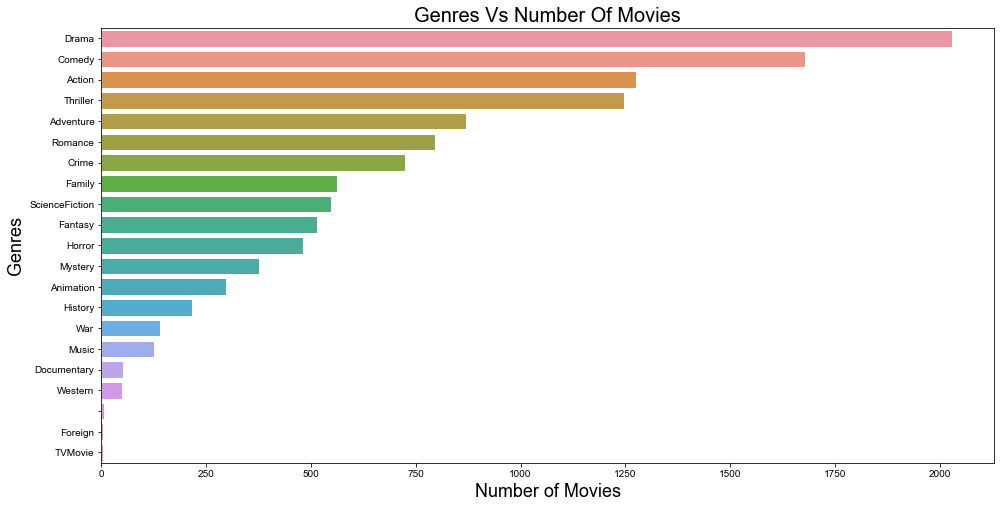

In [5]:
list1 = [] # list with all genres
for i in movies['genres']:
    list1.extend(i)

print("Number of Genres: ", len(pd.Series(list1).unique()))
print(pd.Series(list1).value_counts().sort_values(ascending=False))

# Plot value_counts() in seaborn barplot
# 1. Set the figure size, labels and style sheet
f = plt.figure(figsize=(16, 8))
plt.title("Genres Vs Number Of Movies",fontsize = 20)
plt.xlabel('Number of Movies',fontsize = 18)
plt.ylabel('Genres',fontsize = 18)
sb.set(style="whitegrid", font_scale=2)

# 2. Returns an axis-object not a figure
ax = sb.barplot(x=pd.Series(list1).value_counts(), y=pd.Series(list1).value_counts().index)

# Another method to set label
# ax.set(xlabel='Number of Movies', ylabel='Genres', title='Genres Vs Number Of Movies')

#### Generate Genres WordCloud

In [6]:
# Import package
from wordcloud import WordCloud, STOPWORDS

# Plot WordCloud image
def plot_cloud(wordcloud):
    plt.figure(figsize=(16, 8)) # Set figure size
    plt.imshow(wordcloud)  # Display image
    plt.axis("off") # No axis details
    plt.tight_layout(pad = 0)

In [7]:
# Generate string of all keywords

# 1. Pandas Series of lists to one lists
alist = []
for x in movies['genres']:
    alist.extend(x)
# 2. Convert list to string
genres_string = (" ").join(alist)

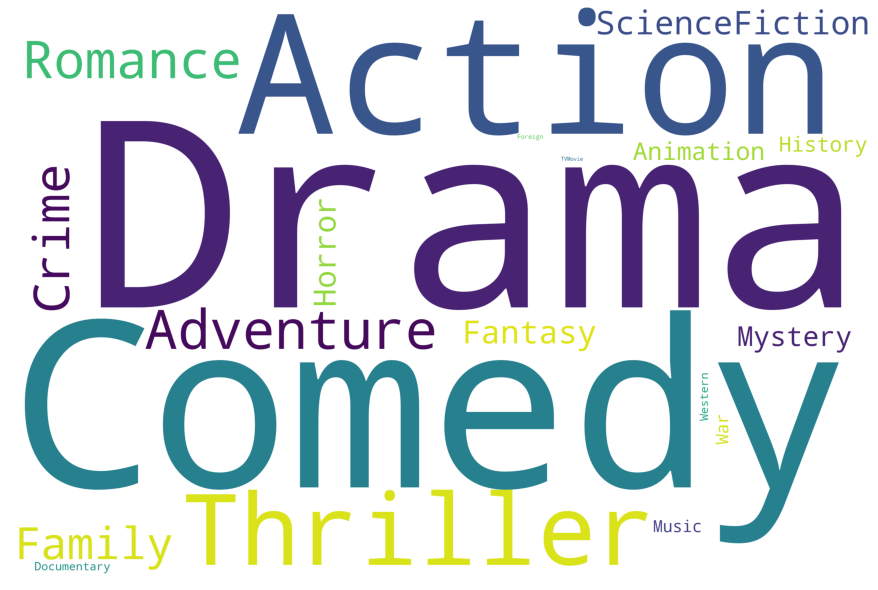

In [8]:
stopwords = set(STOPWORDS)

# Generate the wordcloud object 
wordcloud = WordCloud(width = 3000, height = 2000,
                       random_state=1, collocations=False,
                      background_color='white', stopwords = stopwords).generate(genres_string)

# Plot
plot_cloud(wordcloud)

In [9]:
# Create a dictionary of word frequencies
genres_dictionary = wordcloud.process_text(genres_string)

# Sort the dictionary
word_freq = {k: v for k, v in sorted(genres_dictionary.items(), reverse=True, key=lambda item: item[1])}

# Use words_ to print relative word frequencies
rel_freq = wordcloud.words_

# Print results
print(list(word_freq.items())[:5])
print(list(rel_freq.items())[:5])

[('Drama', 2029), ('Comedy', 1680), ('Action', 1276), ('Thriller', 1248), ('Adventure', 869)]
[('Drama', 1.0), ('Comedy', 0.8279940857565303), ('Action', 0.6288812222769837), ('Thriller', 0.6150813208477083), ('Adventure', 0.42828979793001476)]


In [10]:
# Generate word cloud    
# wordcloud = WordCloud(width = 3000, height = 2000,
#                       random_state=1, collocations=False,
#                       background_color='white', stopwords = stopwords).generate_from_frequencies(word_freq)

####  Convert genre into dummy columns

In [11]:
# Generate a list 'genreList' with all possible unique genres mentioned in the dataset
genres_l = list(pd.Series(list1).unique())

# Create a dictionary to store the truth value of whether it has a specific genres
bool_genres = {}

for i in genres_l:
    #create a list to store the truth value.
    list2 = []
    for j in movies['genres']:
        list2.append(int(i in j))
    bool_genres[i] = list2
                     
# Create the DataFrame containing all the truth values and revenue
genresDF = pd.DataFrame(bool_genres, columns = pd.Series(list1).unique())
genresDF.rename(columns={'':'Empty'}, inplace=True)
movies = pd.concat([movies, genresDF],axis = 1)
movies.head()

,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,release_year,...,ScienceFiction,Horror,History,War,Music,Documentary,Western,Empty,TVMovie,Foreign
0,1350000,"[Comedy, Crime]",8.871,"['Summit Entertainment', 'The Steve Tisch Comp...",28356188.0,105.0,"Lock, Stock and Two Smoking Barrels",8.2,4722.0,1998,...,0,0,0,0,0,0,0,0,0,0
1,16000000,"[Crime, Drama, Action]",34.591,"['Gaumont', 'Les Films du Dauphin']",45284974.0,111.0,L??on: The Professional,8.3,10702.0,1994,...,0,0,0,0,0,0,0,0,0,0
2,1530000,"[Action, Drama, Thriller]",10.156,"['X Filme Creative Pool', 'WDR']",7267585.0,81.0,Run Lola Run,7.3,1485.0,1998,...,0,0,0,0,0,0,0,0,0,0
3,10000000,"[Crime, Comedy]",17.128,"['Screen Gems', 'SKA Films', 'Columbia Pictures']",83557872.0,104.0,Snatch,7.8,6519.0,2000,...,0,0,0,0,0,0,0,0,0,0
4,14000000,"[Romance, Comedy]",51.140,"['Touchstone Pictures', 'Silver Screen Partner...",463000000.0,119.0,Pretty Woman,7.4,5615.0,1990,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Create lists for the mean and median
T_mean_l = []
F_mean_l = []
T_median_l = []
F_median_l = []

for i in genres_l:
    revenue_T = pd.DataFrame(movies[list(map(bool, bool_genres[i]))]) # rows with i in genres
    list2 = [not ele for ele in list(map(bool, bool_genres[i]))]
    revenue_F = pd.DataFrame(movies[list2]) # row without i in genres
    d_revenue_T = revenue_T['revenue'].describe()
    d_revenue_F = revenue_F['revenue'].describe()
    T_mean_l.append(d_revenue_T[1])
    F_mean_l.append(d_revenue_F[1])
    T_median_l.append(d_revenue_T[5])
    F_median_l.append(d_revenue_F[5])
    print()
    print("The revenue of movies with genres ",i)
    print(d_revenue_T)
    print()
    print("The revenue of movies without genres ", i)
    print(d_revenue_F)
    print('-------------------------------------')


The revenue of movies with genres  Comedy
count    1.680000e+03
mean     1.064489e+08
std      1.553440e+08
min      1.000000e+00
25%      1.686853e+07
50%      5.070199e+07
75%      1.299821e+08
max      1.450027e+09
Name: revenue, dtype: float64

The revenue of movies without genres  Comedy
count    2.798000e+03
mean     1.275054e+08
std      2.219622e+08
min      1.000000e+00
25%      1.518893e+07
50%      4.921365e+07
75%      1.370379e+08
max      2.797801e+09
Name: revenue, dtype: float64
-------------------------------------

The revenue of movies with genres  Crime
count    7.250000e+02
mean     8.419785e+07
std      1.247298e+08
min      1.000000e+00
25%      1.465563e+07
50%      4.279256e+07
75%      1.052009e+08
max      1.238765e+09
Name: revenue, dtype: float64

The revenue of movies without genres  Crime
count    3.753000e+03
mean     1.264457e+08
std      2.106157e+08
min      1.000000e+00
25%      1.600000e+07
50%      5.175000e+07
75%      1.412207e+08
max      2.797

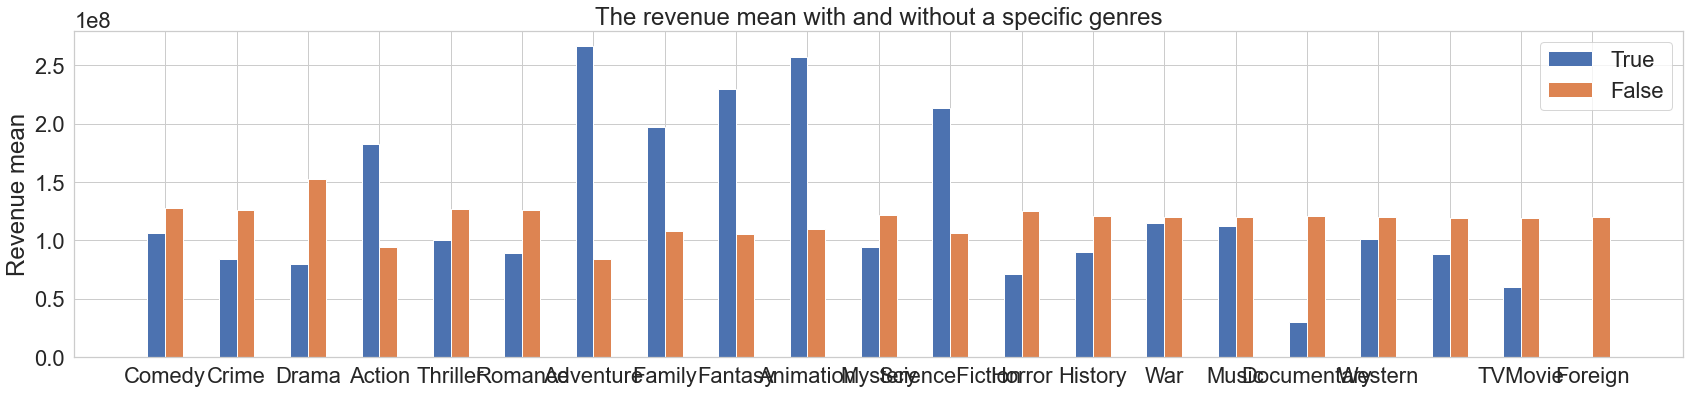

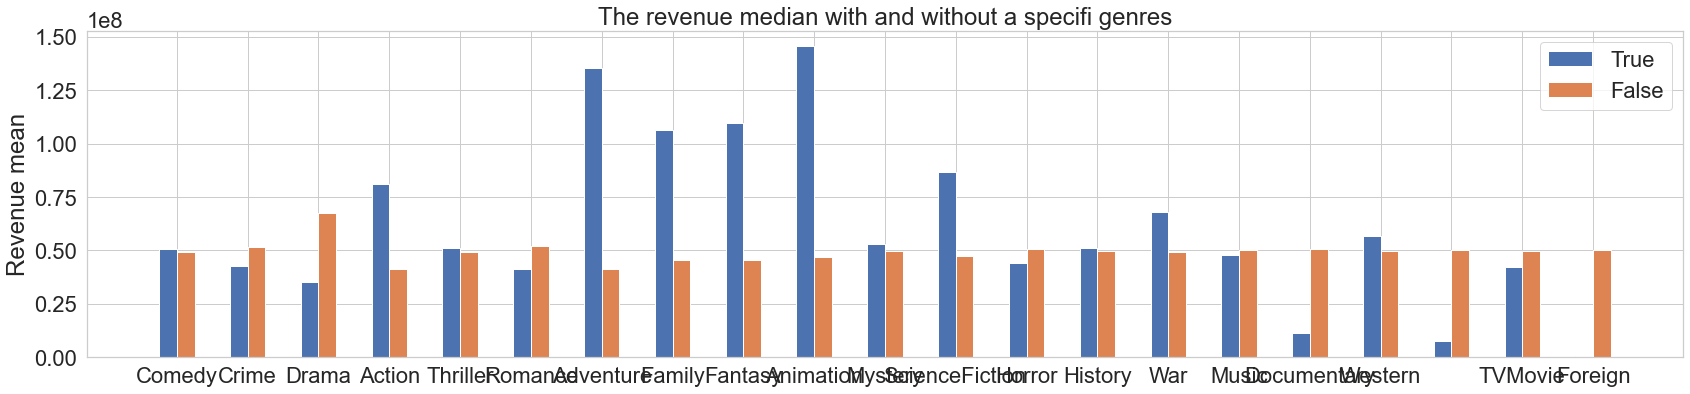

In [13]:
# To see the difference revenue mean
x = np.arange(len(genres_l))
width = 0.25

fig, ax = plt.subplots(figsize = (24, 6))
rects1 = ax.bar(x - width/2, T_mean_l, width, label='True')
rects2 = ax.bar(x + width/2, F_mean_l, width, label='False')

ax.set_ylabel('Revenue mean')
ax.set_title('The revenue mean with and without a specific genres')
ax.set_xticks(x)
ax.set_xticklabels(genres_l)
ax.legend()

fig.tight_layout()

plt.show()

# To see the difference revenue median
x = np.arange(len(genres_l))
width = 0.25

fig, ax = plt.subplots(figsize = (24, 6))
rects1 = ax.bar(x - width/2, T_median_l, width, label='True')
rects2 = ax.bar(x + width/2, F_median_l, width, label='False')

ax.set_ylabel('Revenue mean')
ax.set_title('The revenue median with and without a specifi genres')
ax.set_xticks(x)
ax.set_xticklabels(genres_l)
ax.legend()

fig.tight_layout()
plt.show()

ValueError: Could not interpret input ''

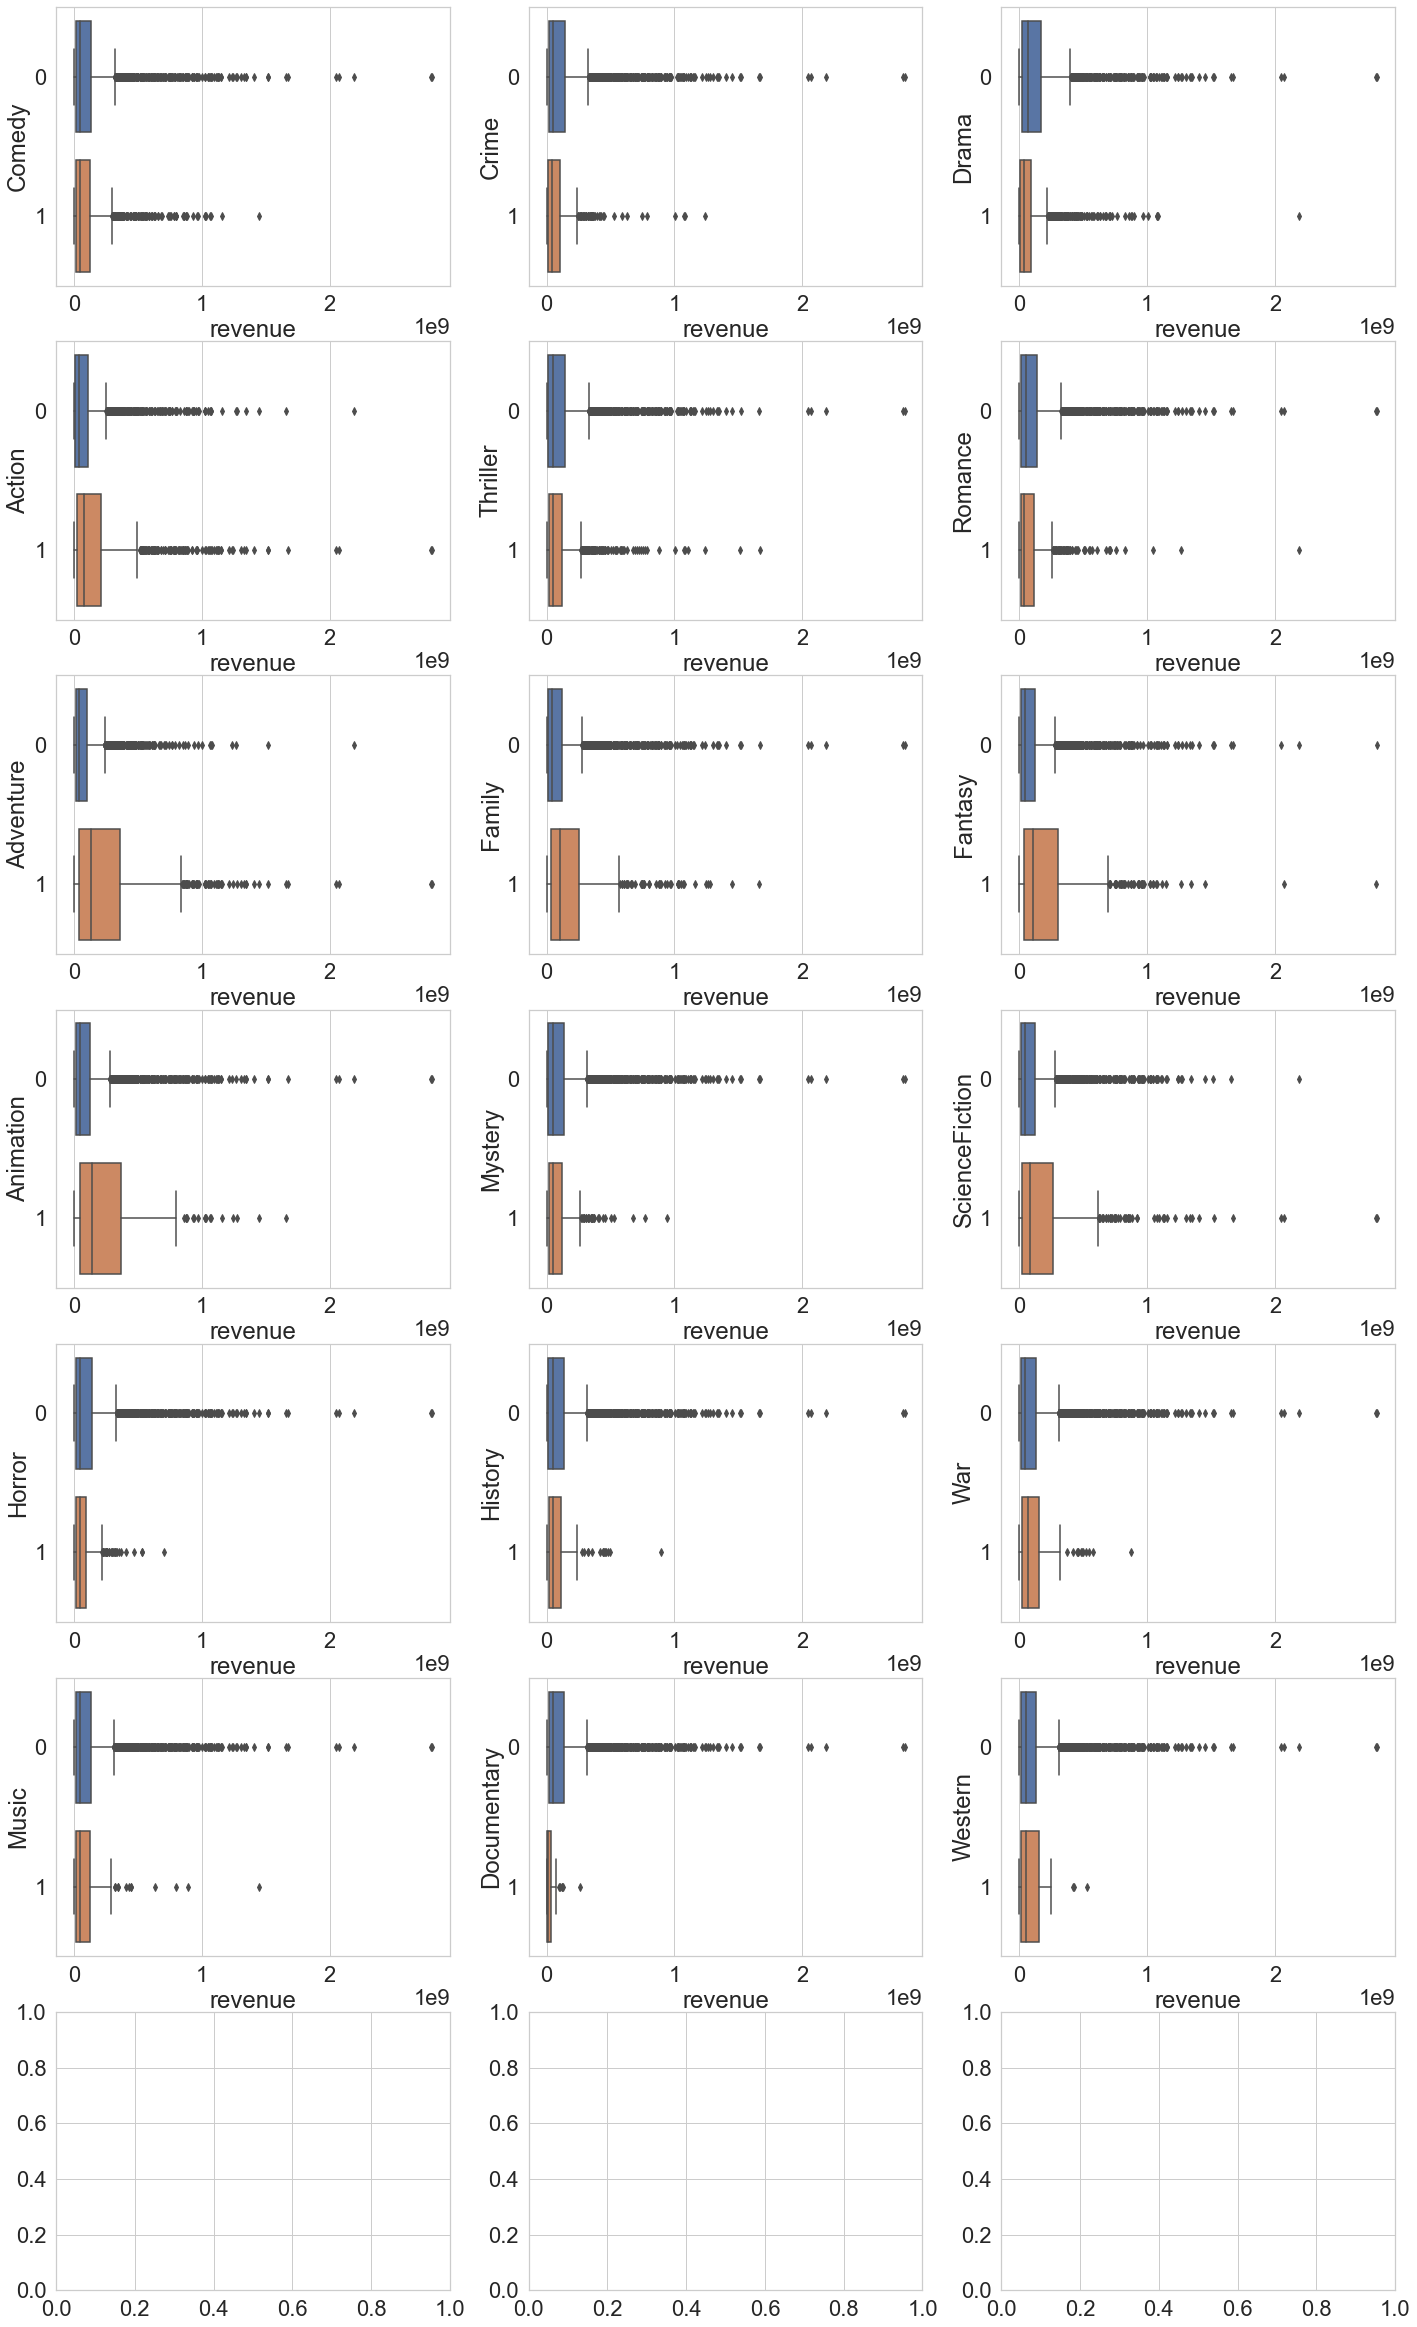

In [14]:
# Vislualization of the revenue distribution
f, axes = plt.subplots(7, 3,figsize = (24,42))
j = 0
k = 0
for i in genres_l:
    sb.boxplot(data = movies, x = 'revenue', y = i, orient='h', ax = axes[k][j])
    j += 1
    if j >= 3:
        k += 1
        j = 0

plt.show()

---
### 3.  Production Company

In [15]:
movies["production_companies"] = movies["production_companies"].str.strip("[]").str.replace(" ","").str.replace("'","")
print(movies["production_companies"])

0       SummitEntertainment,TheSteveTischCompany,SKAFi...
1                               Gaumont,LesFilmsduDauphin
2                                  XFilmeCreativePool,WDR
3                    ScreenGems,SKAFilms,ColumbiaPictures
4               TouchstonePictures,SilverScreenPartnersIV
                              ...                        
4473    PhantomFour,MandalayPictures,BronStudios,TinyG...
4474                                           TinyPonies
4475    AutomatikEntertainment,LowSparkFilms,SignalFil...
4476                                                     
4477                                         DaieiStudios
Name: production_companies, Length: 4478, dtype: object


In [16]:
movies['production_companies'] = movies['production_companies'].str.split(',')
print(movies['production_companies'])

0       [SummitEntertainment, TheSteveTischCompany, SK...
1                            [Gaumont, LesFilmsduDauphin]
2                               [XFilmeCreativePool, WDR]
3                [ScreenGems, SKAFilms, ColumbiaPictures]
4            [TouchstonePictures, SilverScreenPartnersIV]
                              ...                        
4473    [PhantomFour, MandalayPictures, BronStudios, T...
4474                                         [TinyPonies]
4475    [AutomatikEntertainment, LowSparkFilms, Signal...
4476                                                   []
4477                                       [DaieiStudios]
Name: production_companies, Length: 4478, dtype: object


In [17]:
list3 = [] # list with all Production Companies
for i in movies['production_companies']:
    list3.extend(i)
    
print("number of companies: ", len(pd.Series(list3).unique()))
print(pd.Series(list3).value_counts().sort_values(ascending = False))

number of companies:  4940
UniversalPictures         377
WarnerBros.Pictures       373
ColumbiaPictures          304
20thCenturyFox            266
Paramount                 256
                         ... 
P??leImagedeLi??ge          1
SmartestManProductions      1
LightningPictures           1
CorazónInternational        1
DeLaRevoluci??nFilms        1
Length: 4940, dtype: int64


In [18]:
Production_Com = pd.DataFrame(pd.Series(list3).value_counts().sort_values(ascending = False), columns = ['Number']).iloc[1:]
Production_Com = Production_Com.rename_axis('Production_Companies').reset_index()
Production_Com

,Production_Companies,Number
0,WarnerBros.Pictures,373
1,ColumbiaPictures,304
2,20thCenturyFox,266
3,Paramount,256
4,NewLineCinema,196
...,...,...
4934,P??leImagedeLi??ge,1
4935,SmartestManProductions,1
4936,LightningPictures,1
4937,CorazónInternational,1


In [19]:
# Divide Production Companies according to the number of movies it produces and the revenue
Revenue_rank = movies.sort_values(by='revenue',ascending=False).reset_index(drop = True)

FirstClass = list(Production_Com['Production_Companies'].iloc[0:7])
for i in list(range(10)):
    FirstClass.extend(x for x in Revenue_rank['production_companies'][i] if x not in FirstClass)
SecondClass = list(Production_Com['Production_Companies'].iloc[7:100])
ThirdClass = list(Production_Com['Production_Companies'].iloc[100:])

In [20]:
# Function to determine which class the movie is in.
def decide_class(PC_l):
    x = 3
    for i in PC_l:
        if i in FirstClass:
            return 1
        elif i in SecondClass:
            x = 2
    return x

1    2090
2    1347
3    1041
Name: PC_class, dtype: int64

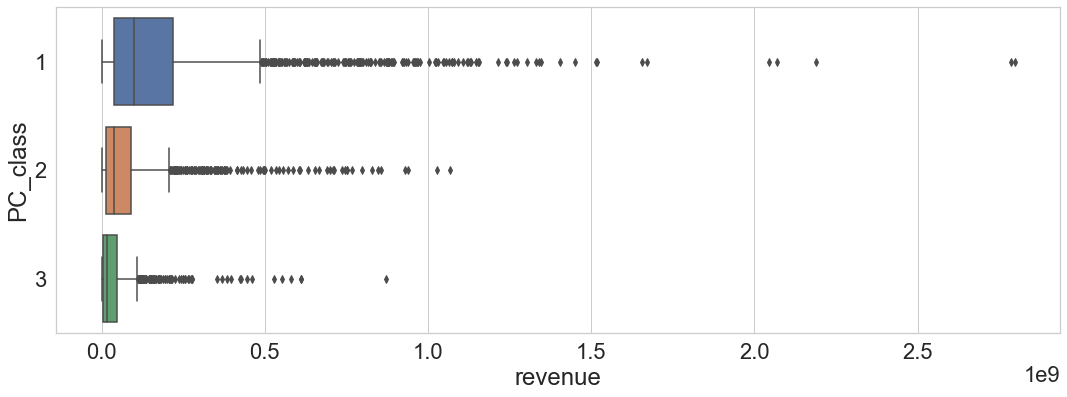

In [21]:
# create list for the class of each movie
class_l = []

for i in movies['production_companies']:
    x = decide_class(i)
    class_l.append(x)
    
revenue_PC = pd.concat([movies['revenue'],pd.DataFrame(class_l, columns = ['PC_class'], dtype = 'category')], axis = 1)
PC_class = pd.DataFrame(class_l,columns = ['PC_class'])
PC_class.to_csv(r'PC_class.csv', index=False)
movies['PC_class'] = pd.Series(class_l,name = 'PC_class')

f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "revenue", y = "PC_class", data = revenue_PC, orient = "h")
revenue_PC['PC_class'].value_counts()

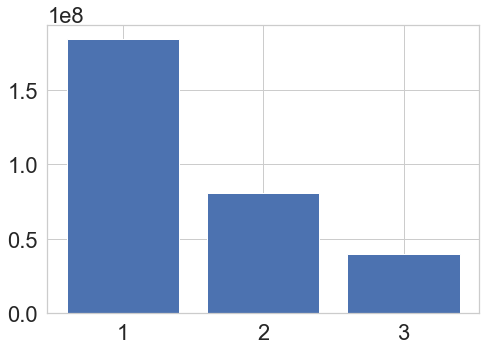

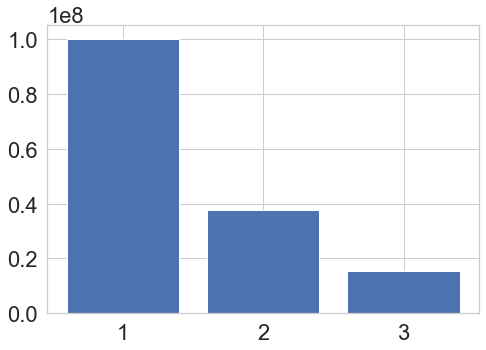

In [22]:
# To show the difference between the mean and median.
mean_l = []
median_l = []

revenue_PC_l = []
for i in range(1,7):
    mean_l.append(float(revenue_PC[revenue_PC['PC_class']==i].describe().iloc[1]))
    median_l.append(float(revenue_PC[revenue_PC['PC_class']==i].describe().iloc[5]))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = list(range(1,7))
ax.bar(x,mean_l)
plt.show()


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,median_l)
plt.show()

---
### 4.  Release Date 
---

In [23]:
movies['release_month'] = movies['release_month'].astype('category')

display(movies['release_year'].describe())
display(movies['release_month'].describe())

count    4478.000000
mean     2005.930326
std         7.897182
min      1990.000000
25%      2000.000000
50%      2006.000000
75%      2012.000000
max      2021.000000
Name: release_year, dtype: float64

count     4478
unique      12
top         12
freq       455
Name: release_month, dtype: int64

<AxesSubplot:title={'center':'Year Vs Movie Number'}, xlabel='release_year,release_year', ylabel='Movie Number'>

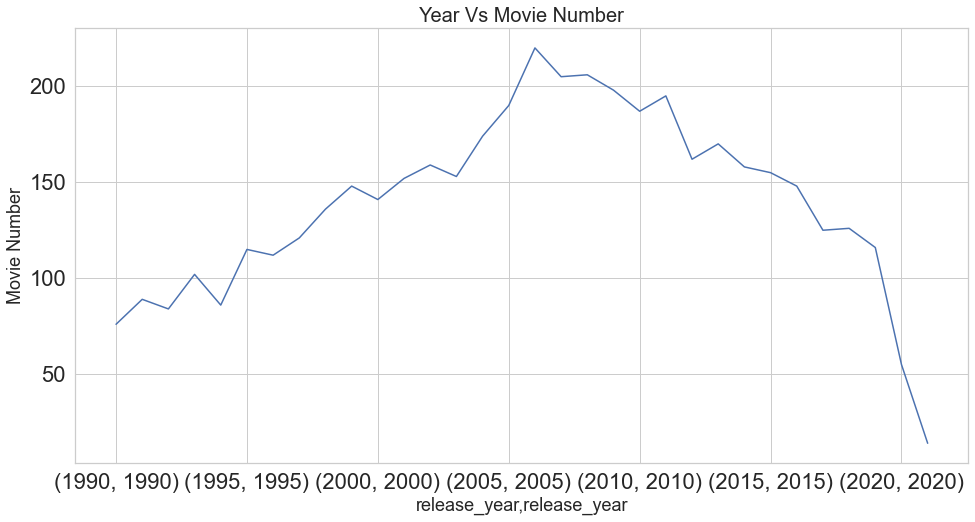

In [24]:
# Setup the size, title and labels of the figure
f = plt.figure(figsize=(16, 8))
plt.title("Year Vs Movie Number",fontsize = 20)
plt.xlabel('Release year',fontsize = 18)
plt.ylabel('Movie Number',fontsize = 18)
sb.set(style="whitegrid", font_scale=1.5)

movies.groupby('release_year')['release_year'].value_counts().plot()

<AxesSubplot:title={'center':'Release Month Vs Revenue'}, xlabel='release_month', ylabel='revenue'>

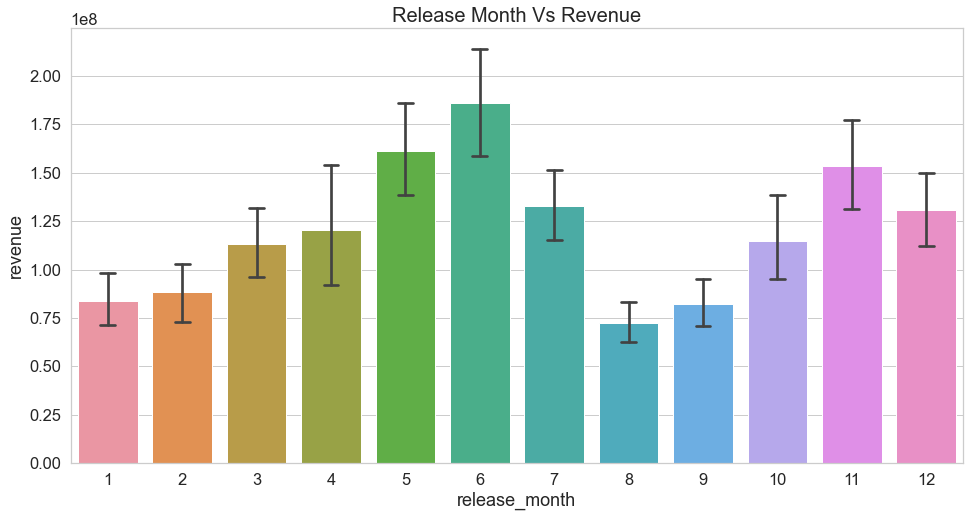

In [25]:
# Set the figure size, labels and style sheet
f = plt.figure(figsize=(16, 8))
plt.title("Release Month Vs Revenue", fontsize = 20)
plt.xlabel('Release Month',fontsize = 18)
plt.ylabel('Revenue',fontsize = 18)
sb.set(style="whitegrid", font_scale=1.5)

# Plot with error bars
sb.barplot(x = movies['release_month'], y = movies['revenue'], capsize=.2)

---
### Numeric Data
---
### Uni-Variate Statistics

In [26]:
def Uni_Variate(data):
    print(data.describe())
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures
    sb.boxplot(data = data, orient = "h", ax = axes[0])
    sb.histplot(data = data, ax = axes[1])
    sb.violinplot(data = data, orient = "h", ax = axes[2])
    

def Bi_Variate(data, col_data1: str, col_data2: str):
    # Create a joint dataframe by concatenating the two variables
    jointDF = pd.concat([data[col_data1], data[col_data2]], axis = 1)
    
    # Draw jointplot of the two variables in the joined dataframe
    f = plt.figure(figsize=(24, 4))
    sb.jointplot(data = jointDF, x = col_data1, y = col_data2, height = 12)
    
    # Calculate the correlation between the two columns/variables
    f = plt.figure(figsize=(8, 4))
    sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

---
### 1. Revenue & Budget

<AxesSubplot:xlabel='adj_revenue', ylabel='Count'>

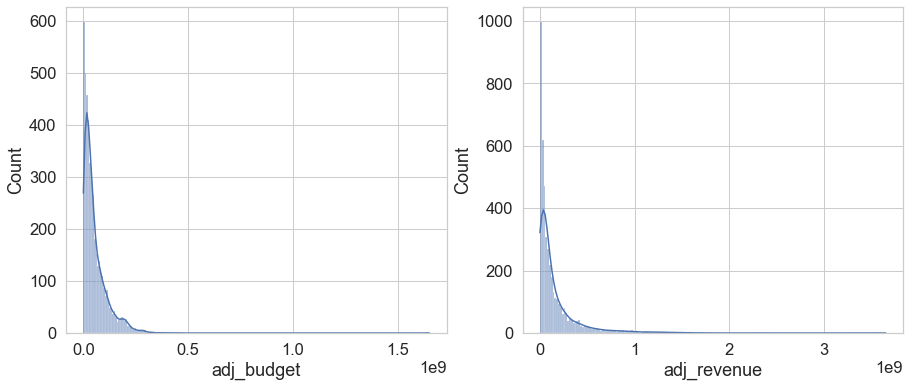

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sb.histplot(movies['adj_budget'], ax=ax1, kde=True)
sb.histplot(movies['adj_revenue'], ax=ax2, kde=True)

**Since the budget and revenue is highly right-skewed, we take the logarith of the budget to adjust for it.**

<AxesSubplot:xlabel='log_revenue', ylabel='Count'>

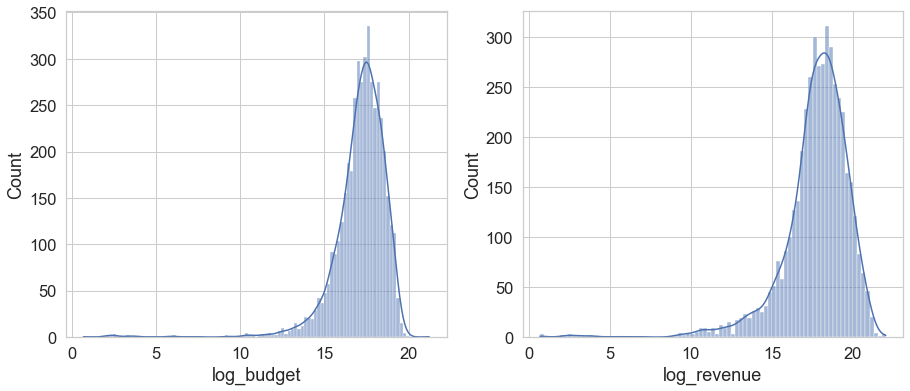

In [28]:
movies['log_budget'] = np.log(movies['adj_budget'] + 1)
movies['log_revenue'] = np.log(movies['adj_revenue'] + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sb.histplot(movies['log_budget'], ax=ax1, kde=True)
sb.histplot(movies['log_revenue'], ax=ax2, kde=True)

count    4478.000000
mean       17.719680
std         2.085691
min         0.693147
25%        16.944756
50%        18.021517
75%        19.017167
max        22.018832
Name: log_revenue, dtype: float64

count    4478.000000
mean       17.123424
std         1.634694
min         0.693147
25%        16.502848
50%        17.369715
75%        18.126310
max        21.224456
Name: log_budget, dtype: float64


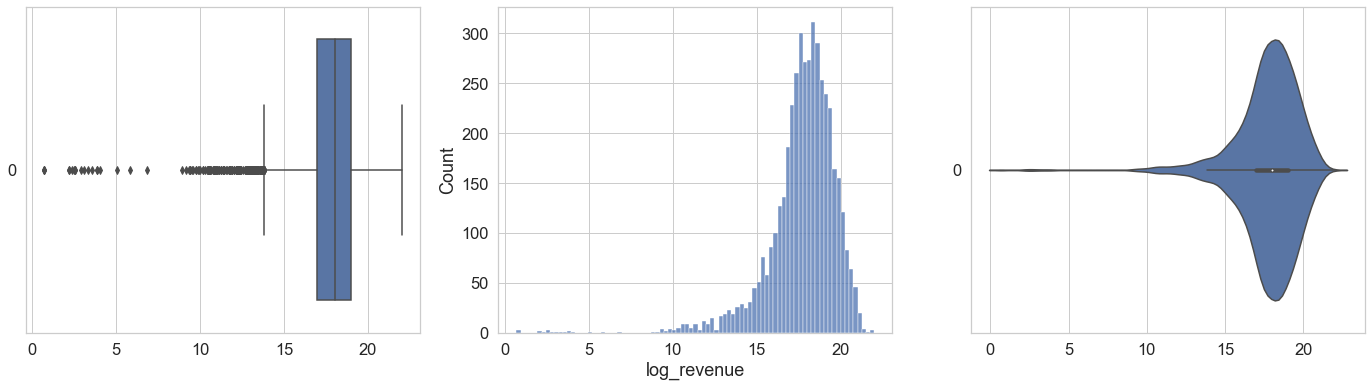

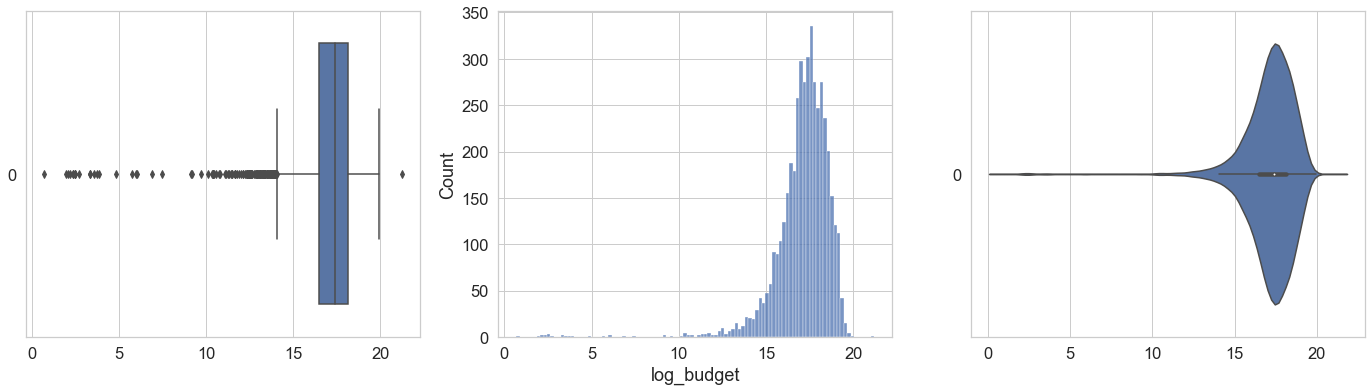

In [29]:
Uni_Variate(movies["log_revenue"])
print()
Uni_Variate(movies["log_budget"])

<Figure size 1728x288 with 0 Axes>

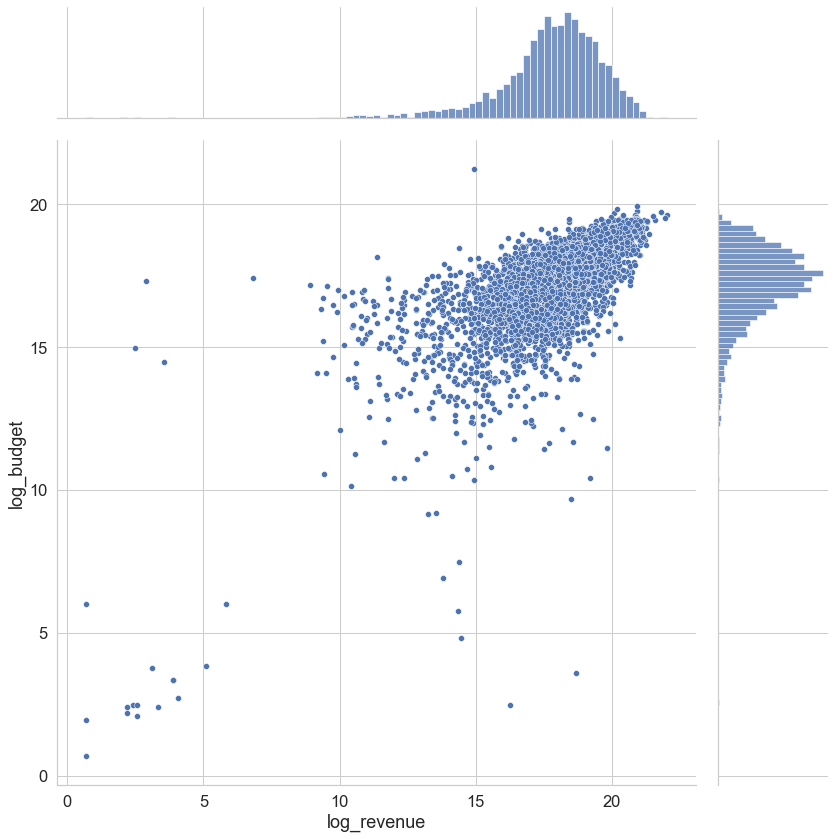

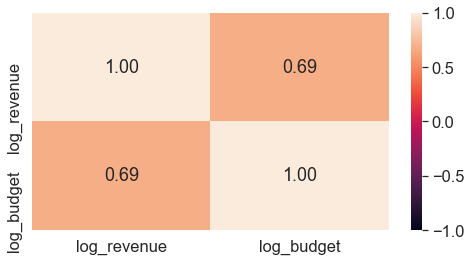

In [30]:
Bi_Variate(movies, "log_revenue", "log_budget")

---
### 2. Popularity

count    4478.000000
mean       26.228416
std       157.743552
min         0.019984
25%        10.302500
50%        14.177500
75%        23.319500
max      9975.169000
Name: popularity, dtype: float64


<AxesSubplot:>

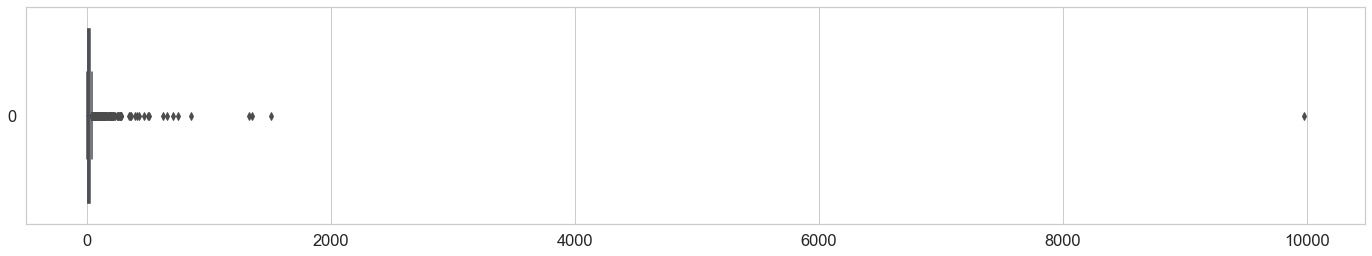

In [31]:
print(movies['popularity'].describe())

f = plt.figure(figsize=(24, 4))
sb.boxplot(data = movies['popularity'], orient = "h")

In [32]:
# Visualize outliers
movies.sort_values(by='popularity',ascending=False)[:5]

,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,release_year,...,War,Music,Documentary,Western,Empty,TVMovie,Foreign,PC_class,log_budget,log_revenue
4037,200000000,"[Action, ScienceFiction]",9975.169,"[WarnerBros.Pictures, LegendaryPictures]",285400000.0,113.0,Godzilla vs. Kong,8.4,3876.0,2021,...,0,0,0,0,0,0,0,1,19.113828,19.469402
4038,50000000,"[Comedy, Family, Animation]",1510.284,"[WarnerAnimationGroup, WarnerBros.Pictures, Tu...",66890000.0,101.0,Tom & Jerry,7.4,1139.0,2021,...,0,0,0,0,0,0,0,1,17.727534,18.018560
4008,60000000,"[Fantasy, Action, Adventure]",1357.833,"[CAPCOM, ConstantinFilm, ImpactPictures, Tence...",25814306.0,104.0,Monster Hunter,7.1,1389.0,2020,...,0,0,0,0,0,0,0,2,17.949076,17.105660
3988,200000000,"[Fantasy, Action, Adventure]",1327.684,"[DCEntertainment, WarnerBros.Pictures, TheSton...",165160000.0,151.0,Wonder Woman 1984,6.8,4728.0,2020,...,0,0,0,0,0,0,0,1,19.153049,18.961646
3990,65000000,"[Family, Fantasy, Animation, Comedy]",856.466,"[UniversalPictures, DreamWorksAnimation]",135076090.0,95.0,The Croods: A New Age,7.5,1912.0,2020,...,0,0,0,0,0,0,0,1,18.029119,18.760570


In [33]:
# Drop the first 5th outliers
movies = movies.loc[movies['popularity'] < 1000]
movies = movies.reset_index(drop=True)

count    4474.000000
mean       23.084461
std        38.720589
min         0.019984
25%        10.300250
50%        14.165000
75%        23.300727
max       856.466000
Name: popularity, dtype: float64


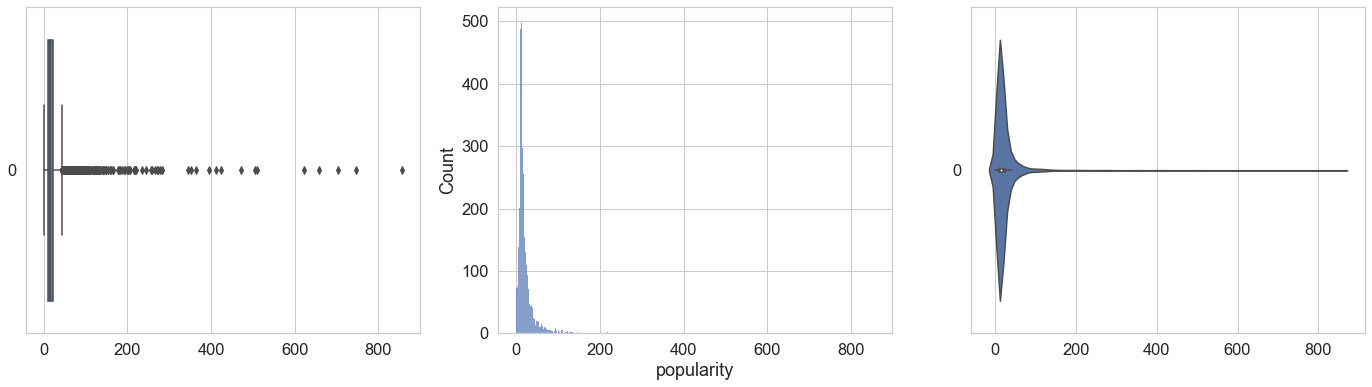

In [34]:
Uni_Variate(movies["popularity"])

**Since the popularity is highly right-skewed, we take the logarith of the budget to adjust for it.**

<AxesSubplot:xlabel='log_popularity', ylabel='Count'>

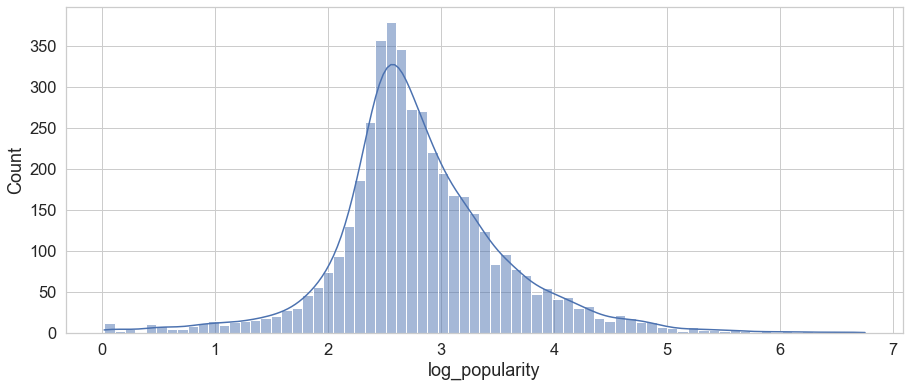

In [35]:
movies['log_popularity'] = np.log(movies['popularity'] + 1)

f = plt.figure(figsize=(15,6))

sb.histplot(movies['log_popularity'], kde=True)

count    4474.000000
mean        2.817547
std         0.762783
min         0.019787
25%         2.424825
50%         2.718990
75%         3.190506
max         6.753982
Name: log_popularity, dtype: float64


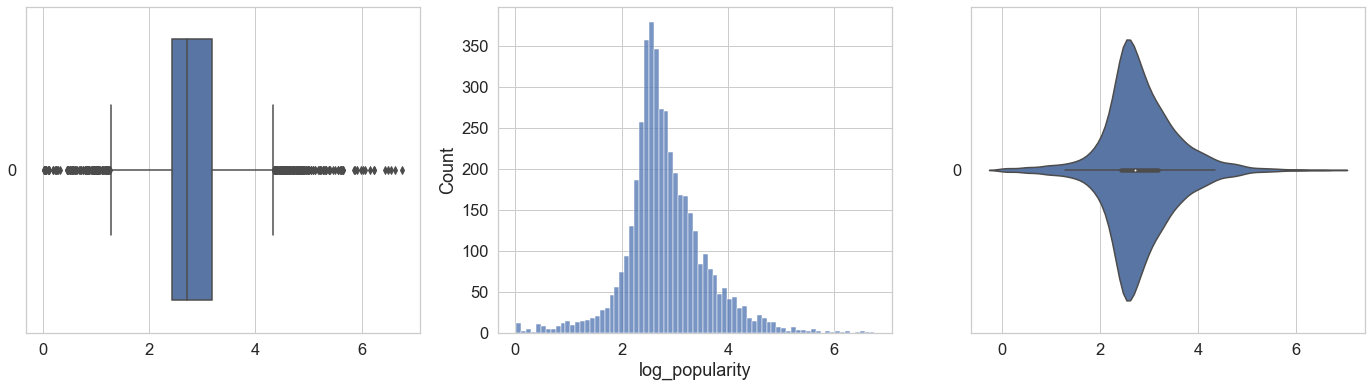

In [36]:
Uni_Variate(movies['log_popularity'])

<Figure size 1728x288 with 0 Axes>

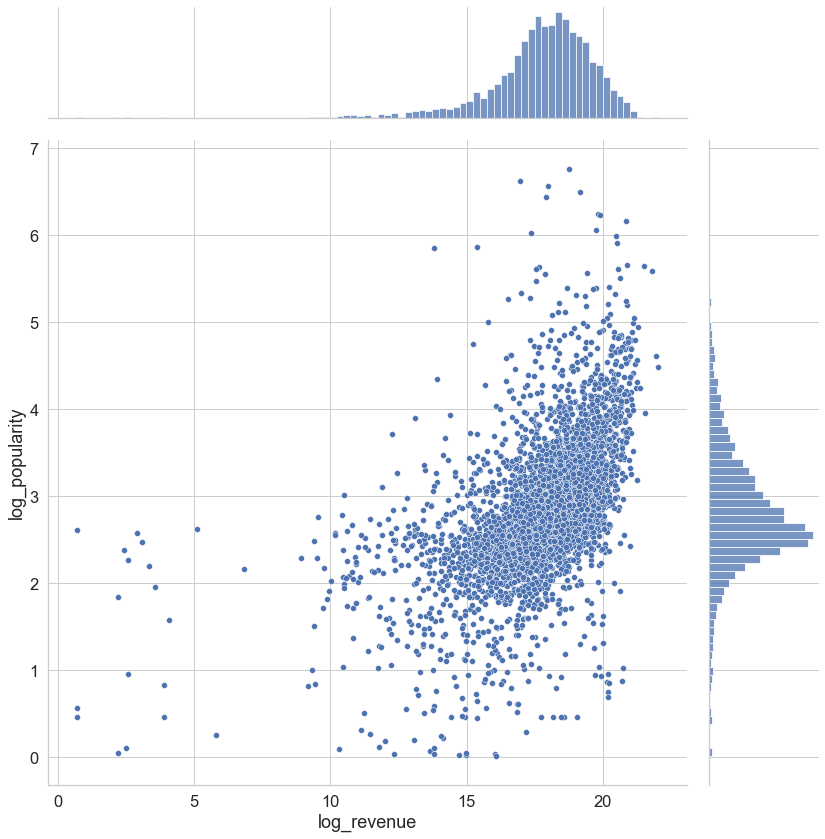

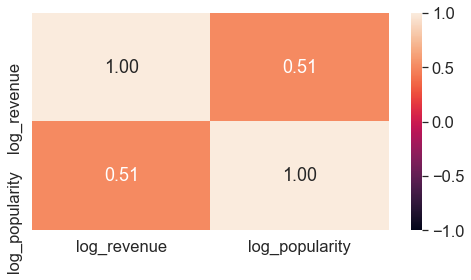

In [37]:
Bi_Variate(movies, "log_revenue", "log_popularity")

---
### 3. Runtime

count    4474.000000
mean      110.029727
std        20.847669
min         3.000000
25%        96.000000
50%       106.000000
75%       121.000000
max       338.000000
Name: runtime, dtype: float64


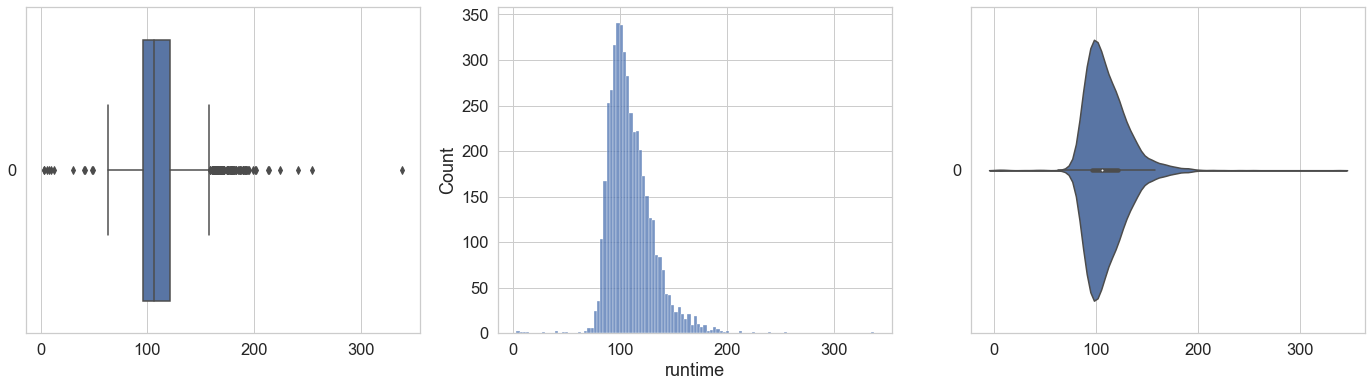

In [38]:
Uni_Variate(movies["runtime"])

In [39]:
# Visualize outliers
movies.sort_values(by='runtime',ascending=False)[:10]

,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,release_year,...,Music,Documentary,Western,Empty,TVMovie,Foreign,PC_class,log_budget,log_revenue,log_popularity
4169,18000000,"[Crime, Drama, Thriller, History]",1.138383,"[EgoliTossellFilmAG, Canal+, ArteFrance, Films...",8.712790e+05,338.0,Carlos,6.7,50.0,2010,...,0,0,0,0,0,0,2,16.912897,13.884732,0.760050
1990,25000000,"[Drama, History, War]",10.893000,"[TriStarTelevision, Esparza/KatzProductions, N...",1.270000e+07,254.0,Gettysburg,6.9,189.0,1993,...,0,0,0,0,0,0,1,17.654963,16.977689,2.475950
1594,1091000,[],7.549000,[],4.290020e+06,241.0,UFC 94: St-Pierre vs. Penn 2,5.1,4.0,2009,...,0,0,0,1,0,0,2,14.125750,15.494946,2.145814
1832,5200000,"[Adventure, Romance, Drama]",7.236000,"[AamirKhanProductions, JhamuSughandProductions...",8.100000e+06,224.0,Lagaan: Once Upon a Time in India,7.4,357.0,2001,...,0,0,0,0,0,0,3,15.882880,16.326085,2.108515
1651,56000000,"[Drama, History, War]",11.747000,"[WarnerBros.Pictures, TurnerPictures, Antietam...",1.292394e+07,214.0,Gods and Generals,6.0,110.0,2003,...,0,0,0,0,0,0,1,18.219299,16.753028,2.545296
1478,5800000,"[Adventure, Romance, History]",8.714000,"[UTVMotionPictures, AshutoshGowarikerProductions]",2.870000e+07,213.0,Jodhaa Akbar,7.4,176.0,2008,...,0,0,0,0,0,0,3,15.796512,17.395551,2.273568
463,34000000,"[Drama, History]",11.147000,"[40AcresandaMuleFilmworks, JVC, WarnerBros.Pic...",4.816991e+07,202.0,Malcolm X,7.5,1050.0,1992,...,0,0,0,0,0,0,1,17.988974,18.337348,2.497082
10,94000000,"[Adventure, Fantasy, Action]",68.771000,"[NewLineCinema, WingNutFilms, TheSaulZaentzCom...",1.118889e+09,201.0,The Lord of the Rings: The Return of the King,8.5,17389.0,2003,...,0,0,0,0,0,0,1,18.737242,21.214038,4.245218
2335,3900000,"[History, Drama, Crime]",1.669000,[RaajkamalFilmsInternational],4.900000e+06,199.0,Hey Ram,6.4,27.0,2000,...,0,0,0,0,0,0,3,15.621173,15.849432,0.981704
116,22000000,"[Drama, History, War]",37.478000,"[UniversalPictures, AmblinEntertainment]",3.213656e+08,195.0,Schindler's List,8.6,11183.0,1993,...,0,0,0,0,0,0,1,17.527130,20.208666,3.650087


In [40]:
# Drop the first 5th outliers
movies = movies.loc[movies['runtime'] < 300]
movies = movies.reset_index(drop=True)

<Figure size 1728x288 with 0 Axes>

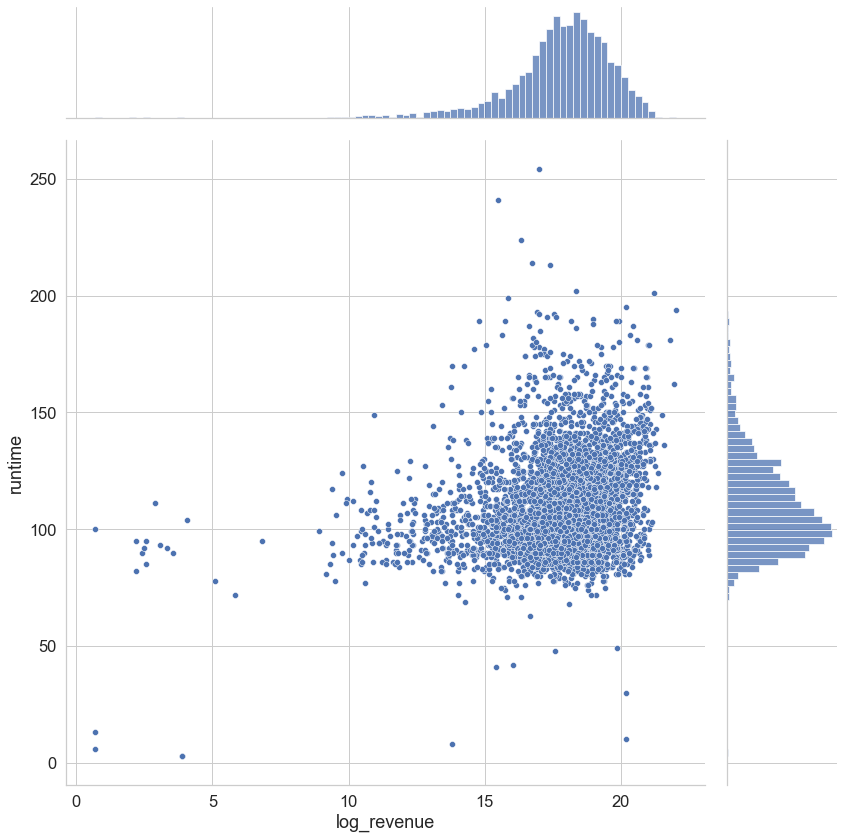

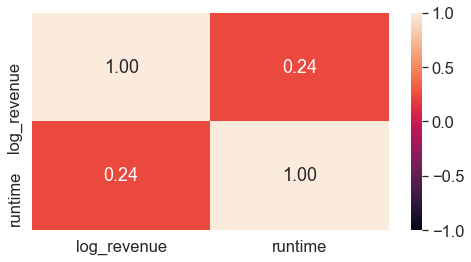

In [41]:
Bi_Variate(movies, "log_revenue", "runtime")

### 4. vote_average  

count    4473.000000
mean        6.422066
std         0.852416
min         1.000000
25%         5.900000
50%         6.400000
75%         7.000000
max        10.000000
Name: vote_average, dtype: float64


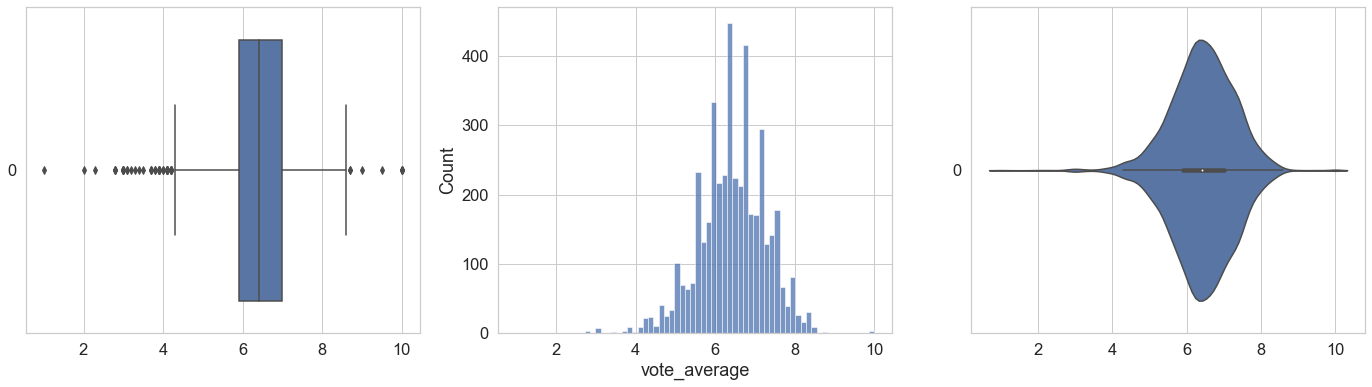

In [42]:
Uni_Variate(movies["vote_average"])

In [43]:
# Visualize outliers
movies.sort_values(by='vote_average',ascending=True)[:10]

,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,release_year,...,Music,Documentary,Western,Empty,TVMovie,Foreign,PC_class,log_budget,log_revenue,log_popularity
4040,2000000,"[Animation, Action, Adventure, History, Drama,...",5.308000,[ProductionI.G],3607899.0,90.0,Fate Grand Order: The Movie - Wandering: Agateram,1.0,1.0,2021,...,0,0,0,0,0,0,3,14.508658,15.098636,1.841819
3793,15000,"[Comedy, Crime]",0.600000,[PouyaFilm],100000000.0,90.0,Khaltoor,2.0,1.0,2018,...,0,0,0,0,0,0,3,9.683526,18.488339,0.470004
4066,65000000,"[Animation, Action, Comedy, Family]",5.258726,"[ThresholdEntertainment, LionsGateFamilyEntert...",73706.0,87.0,Foodfight!,2.3,28.0,2012,...,0,0,0,0,0,0,3,18.146902,11.364855,1.833977
2476,7000000,"[Horror, Action, Thriller]",11.702000,"[HeroldProductions, BollKinoBeteiligungsGmbH&C...",13818181.0,90.0,House of the Dead,2.8,238.0,2003,...,0,0,0,0,0,0,3,16.139857,16.819932,2.541759
1492,30000000,"[Action, Adventure, Fantasy, ScienceFiction, T...",30.973000,"[WorldFilmMagic, DuneEntertainment, StarOverse...",58228460.0,85.0,Dragonball Evolution,2.8,1449.0,2009,...,0,0,0,0,0,0,1,17.439852,18.103028,3.464892
1646,750000,"[Drama, Horror, Mystery]",1.573000,"[OneMoreThoughtEntertainment, AceMovieCompany]",2760000.0,179.0,Phoonk,2.8,11.0,2008,...,0,0,0,0,0,0,3,13.750973,15.053885,0.945073
4456,300000,[Drama],0.374291,"[ForensicFilms, ToastFilms]",40542.0,94.0,"First Love, Last Rites",3.0,1.0,1998,...,0,0,0,0,0,0,3,13.112315,11.110880,0.317938
4220,12000000,"[Comedy, Romance]",1.623338,[19Entertainment],4922166.0,90.0,From Justin to Kelly,3.0,23.0,2003,...,0,0,0,0,0,0,3,16.678854,15.787696,0.964448
4226,19000000,"[Animation, Family, Action, Adventure, Comedy]",0.738652,[],2570000.0,89.0,Legend of a Rabbit,3.0,3.0,2011,...,0,0,0,0,0,0,2,16.933903,14.933370,0.553110
4253,10000000,[Comedy],0.666218,"[HollywoodPictures, CinergiPicturesEntertainment]",45779.0,86.0,"An Alan Smithee Film: Burn, Hollywood, Burn",3.0,9.0,1998,...,0,0,0,0,0,0,2,16.618871,11.232365,0.510556


<Figure size 1728x288 with 0 Axes>

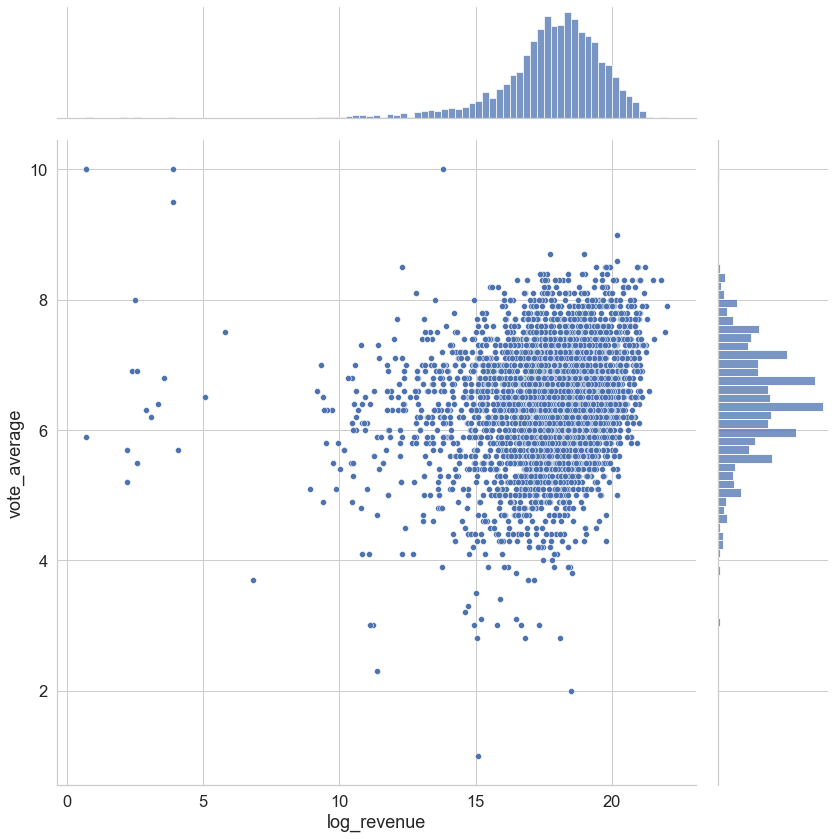

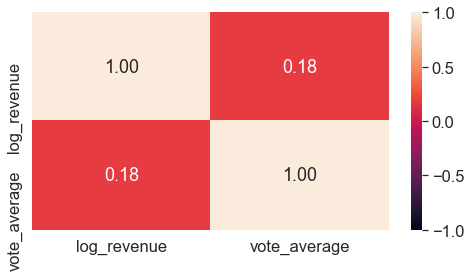

In [44]:
Bi_Variate(movies, "log_revenue", "vote_average")

### 5. vote_count

count     4473.000000
mean      2097.243014
std       3149.740675
min          1.000000
25%        251.000000
50%        905.000000
75%       2520.000000
max      28790.000000
Name: vote_count, dtype: float64


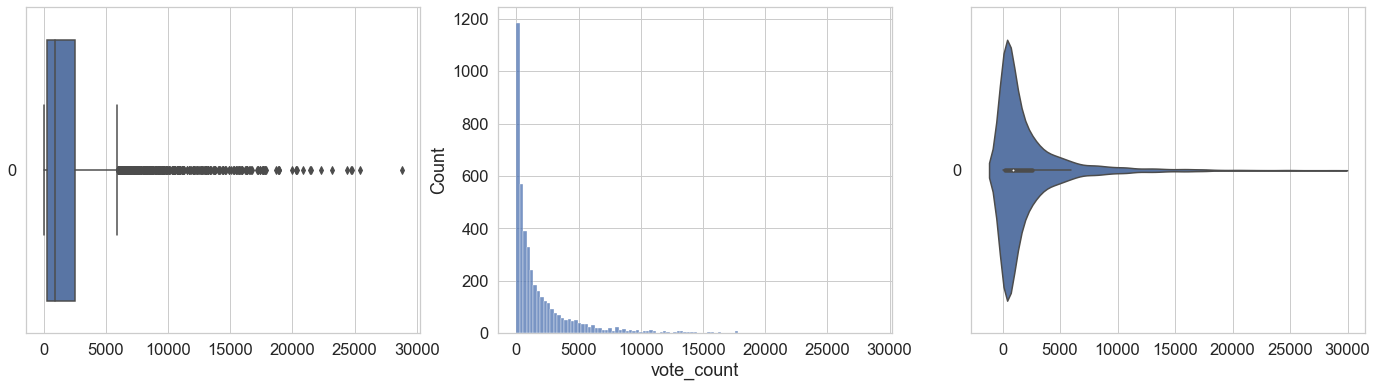

In [45]:
Uni_Variate(movies["vote_count"])

In [46]:
# Visualize outliers
movies.sort_values(by='vote_count',ascending=False)[:10]

,budget,genres,popularity,production_companies,revenue,runtime,title,vote_average,vote_count,release_year,...,Music,Documentary,Western,Empty,TVMovie,Foreign,PC_class,log_budget,log_revenue,log_popularity
2714,160000000,"[Action, ScienceFiction, Adventure]",47.246,"[LegendaryPictures, Syncopy, WarnerBros.Pictures]",8.255328e+08,148.0,Inception,8.3,28790.0,2010,...,0,0,0,0,0,0,1,19.097699,20.738554,3.876313
3235,165000000,"[Adventure, Drama, ScienceFiction]",90.503,"[LegendaryPictures, Syncopy, LyndaObstProducti...",6.751200e+08,169.0,Interstellar,8.3,25469.0,2014,...,0,0,0,0,0,0,1,19.043674,20.452619,4.516372
20,185000000,"[Drama, Action, Crime, Thriller]",72.727,"[DCComics, LegendaryPictures, Syncopy, IsobelG...",1.004558e+09,152.0,The Dark Knight,8.5,24772.0,2008,...,0,0,0,0,0,0,1,19.259010,20.950957,4.300369
3491,58000000,"[Action, Adventure, Comedy]",104.025,"[20thCenturyFox, MarvelEntertainment]",7.831000e+08,108.0,Deadpool,7.6,24696.0,2016,...,0,0,0,0,0,0,1,17.989282,20.592100,4.654198
2975,220000000,"[ScienceFiction, Action, Adventure]",139.977,"[MarvelStudios, Paramount]",1.518816e+09,143.0,The Avengers,7.7,24419.0,2012,...,0,0,0,0,0,0,1,19.366142,21.298200,4.948597
1850,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",100.013,"[DuneEntertainment, LightstormEntertainment, 2...",2.787965e+09,162.0,Avatar,7.5,23160.0,2009,...,0,0,0,0,0,0,1,19.506714,21.971721,4.615249
3228,170000000,"[Action, ScienceFiction, Adventure]",37.126,[MarvelStudios],7.727766e+08,121.0,Guardians of the Galaxy,7.9,22261.0,2014,...,0,0,0,0,0,0,1,19.073527,20.587718,3.640896
3740,300000000,"[Adventure, Action, ScienceFiction]",283.248,[MarvelStudios],2.046240e+09,149.0,Avengers: Infinity War,8.3,21470.0,2018,...,0,0,0,0,0,0,1,19.586952,21.506928,5.649847
155,63000000,[Drama],43.493,"[RegencyEnterprises, Fox2000Pictures, TaurusFi...",1.008538e+08,139.0,Fight Club,8.4,21422.0,1999,...,0,0,0,0,0,0,1,18.434879,18.905416,3.795332
212,8000000,"[Thriller, Crime]",57.179,"[Miramax, ABandApart, JerseyFilms]",2.141791e+08,154.0,Pulp Fiction,8.5,20851.0,1994,...,0,0,0,0,0,0,2,16.488279,19.775650,4.063524


**Since the vote_average is highly right-skewed, we take the logarith of the budget to adjust for it.**

<AxesSubplot:xlabel='log_vote_count', ylabel='Count'>

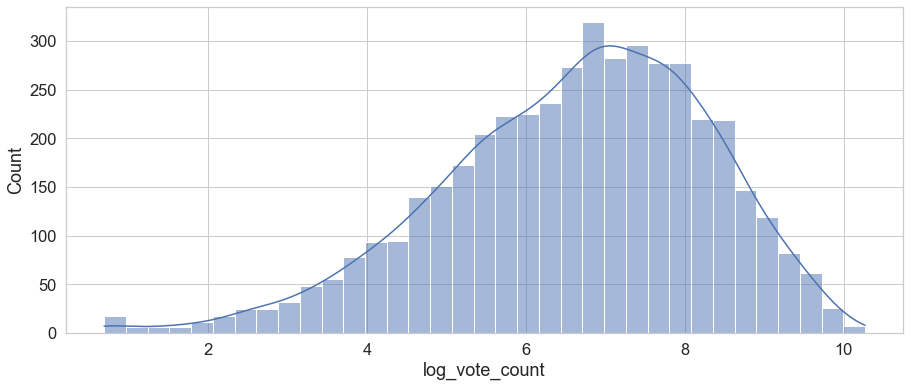

In [47]:
movies['log_vote_count'] = np.log(movies['vote_count'] + 1)

f = plt.figure(figsize=(15,6))

sb.histplot(movies['log_vote_count'], kde=True)

count    4473.000000
mean        6.602856
std         1.683086
min         0.693147
25%         5.529429
50%         6.809039
75%         7.832411
max        10.267818
Name: log_vote_count, dtype: float64


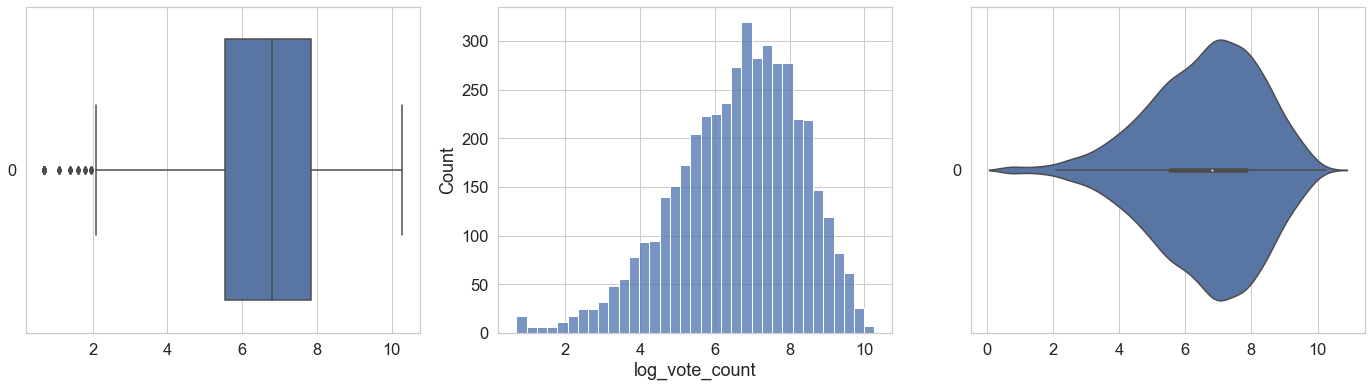

In [48]:
Uni_Variate(movies["log_vote_count"])

<Figure size 1728x288 with 0 Axes>

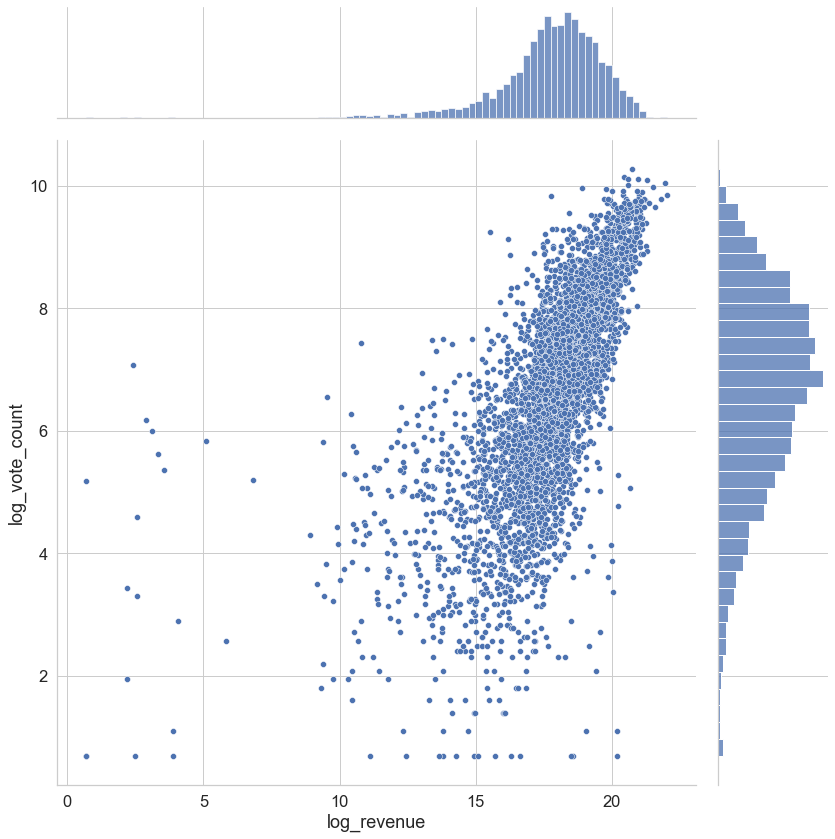

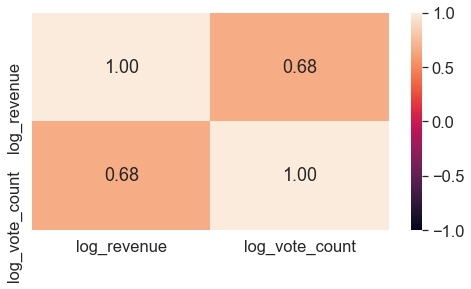

In [49]:
Bi_Variate(movies, "log_revenue", "log_vote_count")

---
### Multi-Variabte Statistics

In [50]:
movies.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,adj_revenue,adj_budget,Comedy,...,Documentary,Western,Empty,TVMovie,Foreign,PC_class,log_budget,log_revenue,log_popularity,log_vote_count
count,4.473000e+03,4473.000000,4.473000e+03,4473.000000,4473.000000,4473.000000,4473.000000,4.473000e+03,4.473000e+03,4473.000000,...,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000
mean,4.053264e+07,23.089367,1.196177e+08,109.978761,6.422066,2097.243014,2005.916387,1.567090e+08,5.413415e+07,0.375363,...,0.011402,0.011178,0.001341,0.000671,0.000894,1.766152,17.122253,17.719939,2.818007,6.602856
std,4.697794e+07,38.723528,1.999149e+08,20.569361,0.852416,3149.740675,7.889310,2.496479e+08,6.108919e+07,0.484271,...,0.106180,0.105146,0.036604,0.025892,0.029894,0.802973,1.634980,2.085797,0.762247,1.683086
min,1.000000e+00,0.019984,1.000000e+00,3.000000,1.000000,1.000000,1990.000000,1.000000e+00,1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.693147,0.693147,0.019787,0.693147
25%,1.100000e+07,10.301000,1.560854e+07,96.000000,5.900000,251.000000,2000.000000,2.284368e+07,1.469000e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.502678,16.944185,2.424891,5.529429
50%,2.500000e+07,14.173000,4.985177e+07,106.000000,6.400000,905.000000,2006.000000,6.724622e+07,3.465000e+07,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,17.360808,18.023871,2.719518,6.809039
75%,5.020000e+07,23.301000,1.338218e+08,121.000000,7.000000,2520.000000,2012.000000,1.816036e+08,7.450000e+07,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,18.126310,19.017337,3.190518,7.832411
max,9.653130e+08,856.466000,2.797801e+09,254.000000,10.000000,28790.000000,2021.000000,3.653065e+09,1.650685e+09,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,21.224456,22.018832,6.753982,10.267818


In [51]:
# Extract all the numeric values in the movies dataset
numDF = pd.DataFrame(movies[['log_revenue', 'log_budget', 'log_popularity', 'runtime', 'vote_average', 'log_vote_count']])

# Summary Statistics for all Variables
numDF.describe()

,log_revenue,log_budget,log_popularity,runtime,vote_average,log_vote_count
count,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000,4473.000000
mean,17.719939,17.122253,2.818007,109.978761,6.422066,6.602856
std,2.085797,1.634980,0.762247,20.569361,0.852416,1.683086
min,0.693147,0.693147,0.019787,3.000000,1.000000,0.693147
25%,16.944185,16.502678,2.424891,96.000000,5.900000,5.529429
50%,18.023871,17.360808,2.719518,106.000000,6.400000,6.809039
75%,19.017337,18.126310,3.190518,121.000000,7.000000,7.832411
max,22.018832,21.224456,6.753982,254.000000,10.000000,10.267818


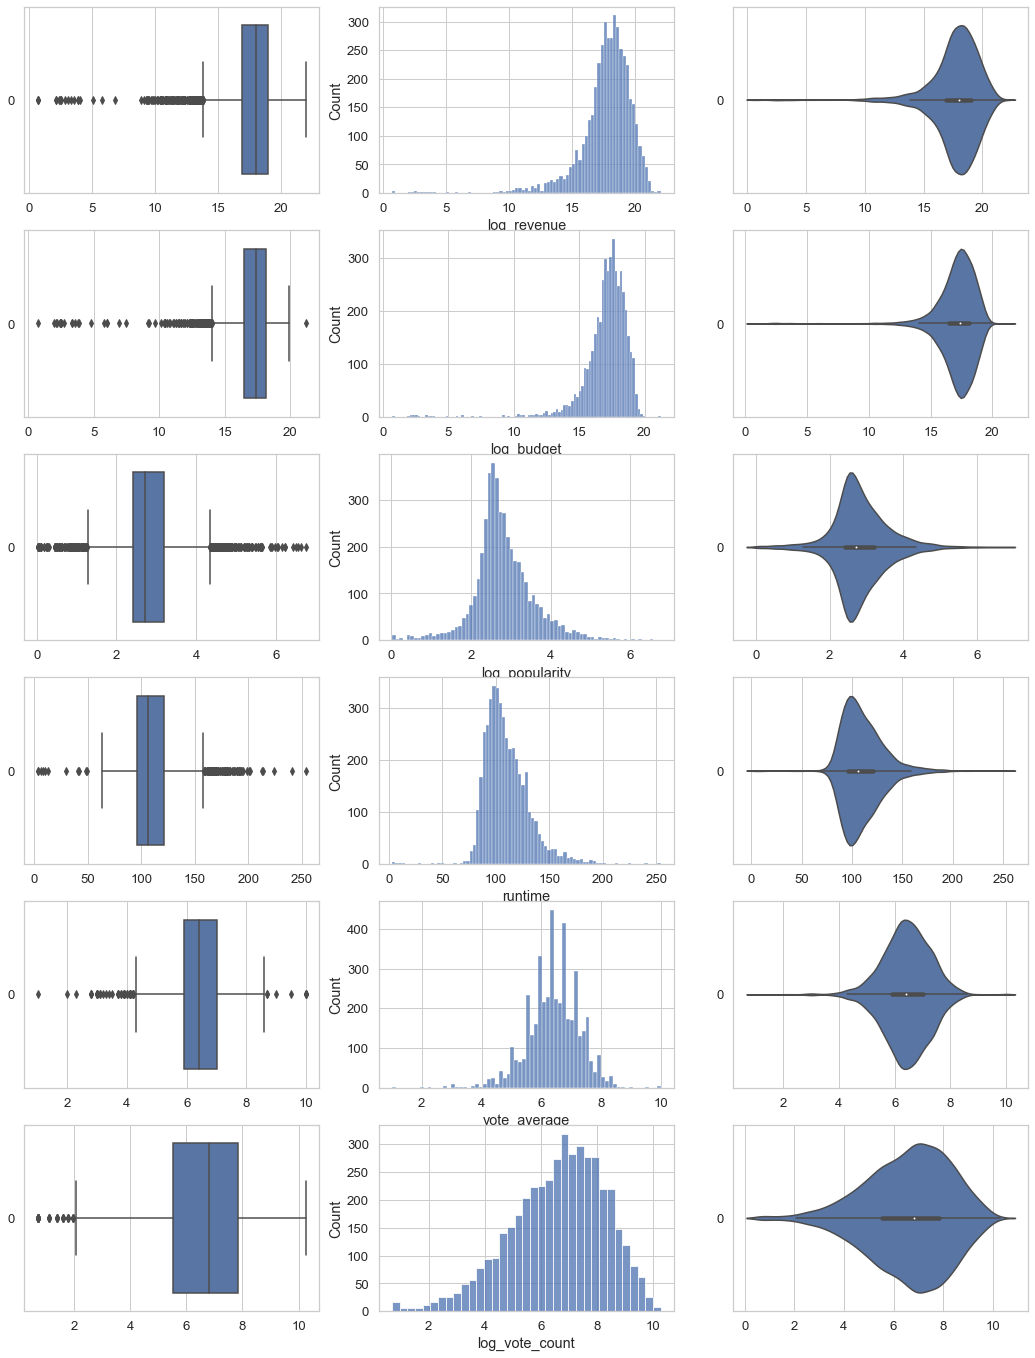

In [52]:
sb.set(style="whitegrid", font_scale=1.2)
# Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in numDF:
    sb.boxplot(data = numDF[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numDF[var], ax = axes[count,1])
    sb.violinplot(data = numDF[var], orient = "h", ax = axes[count,2])
    count += 1

In [ ]:
# Calculate the complete  correlation matrix
numDF.corr()

In [ ]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

In [ ]:
movies.info()

In [ ]:
movies.drop(['budget', 'genres', 'adj_budget', 'adj_revenue', 'popularity', 'production_companies', 'revenue', 
             'title', 'vote_count', 'release_year'],axis=1,inplace=True)


In [ ]:
movies.info()

---
### Export new dataframe to a csv file

In [53]:
# index= False to not write out an unamed index column
movies.to_csv(r'data/movie_data.csv', index=False)